In [2]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv('features_with_ids_new.csv')
print(df.shape)
print(df.head())

(15175, 131)
           material_id  prediction  feature_0  feature_1  feature_2  \
0  8056830-(id_167611)    7.290914   0.000713   0.051164   2.092555   
1  8067418-(id_167648)    8.308079   0.000151   0.036843   1.142691   
2  8078629-(id_167649)    9.649391   0.000294   0.023424   0.448986   
3  8080784-(id_167612)    8.485247   0.000393   0.060444   0.955970   
4  8084708-(id_167650)    9.082074   0.000282   0.047227   0.931436   

   feature_3  feature_4  feature_5  feature_6  feature_7  ...  feature_119  \
0   0.006614   0.000006   0.000010   0.970378   0.000506  ...     8.482599   
1   0.005308   0.000003   0.000002   0.696522   0.000089  ...     9.452689   
2   0.001008   0.000011   0.000002   0.468109   0.000030  ...     8.705463   
3   0.003297   0.000008   0.000003   0.701654   0.000051  ...     9.488973   
4   0.004798   0.000005   0.000002   0.712458   0.000089  ...     9.215837   

    feature_120  feature_121  feature_122  feature_123  feature_124  \
0  4.017468e-05     

In [3]:
feature_cols = [col for col in df.columns if col not in ['material_id', 'prediction']]
X = df[feature_cols].astype(float).values
y = df['prediction'].values
y_actuall = df['actual'].values

# 可选：标准化（DBSCAN对距离敏感，建议标准化）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. t-SNE降维到2D
tsne = TSNE(n_components=2, random_state=42, perplexity=40, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

# 3. KMeans 聚类
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_tsne)

# 4. DBSCAN 聚类
dbscan = DBSCAN(eps=3.5, min_samples=10)  # eps和min_samples可微调
clusters_dbscan = dbscan.fit_predict(X_tsne)

# 5. 性能数据可视化（假设叫'target'或'performance'列）
performance_col = 'prediction' if 'prediction' in df.columns else 'performance'
performance = df[performance_col].values

actual_performance = 'actual' if 'actual' in df.columns else 'performance'
actual_value = df[actual_performance].values

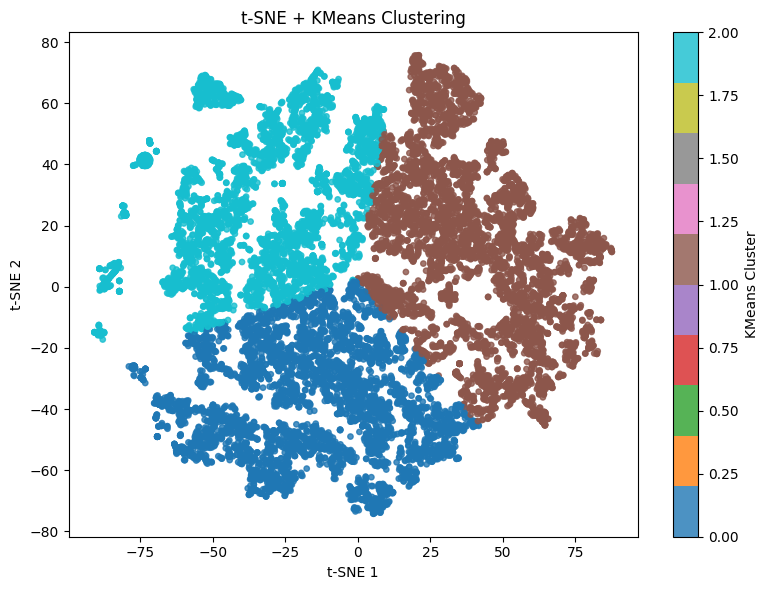

In [4]:
# 6. 可视化1：t-SNE + KMeans
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_kmeans, cmap='tab10', s=15, alpha=0.8)
plt.title('t-SNE + KMeans Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='KMeans Cluster')
plt.tight_layout()
plt.show()

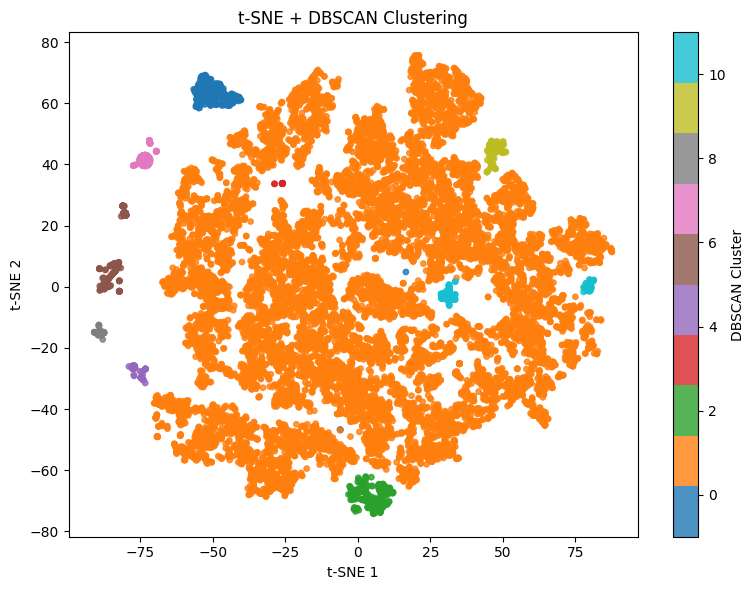

In [5]:
# 7. 可视化2：t-SNE + DBSCAN
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_dbscan, cmap='tab10', s=15, alpha=0.8)
plt.title('t-SNE + DBSCAN Clustering')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(label='DBSCAN Cluster')
plt.tight_layout()
plt.show()

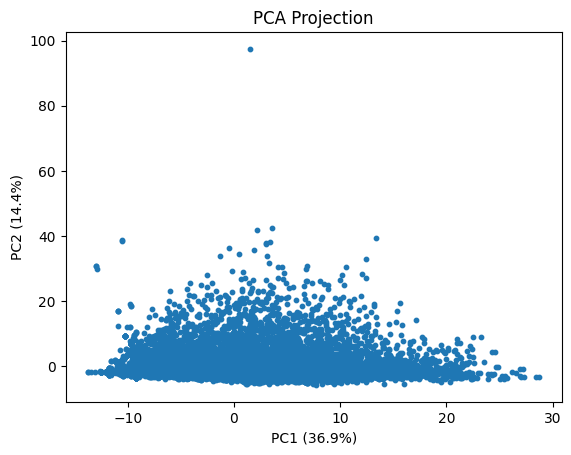

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:,0], X_pca[:,1], s=10)
plt.title("PCA Projection")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.show()

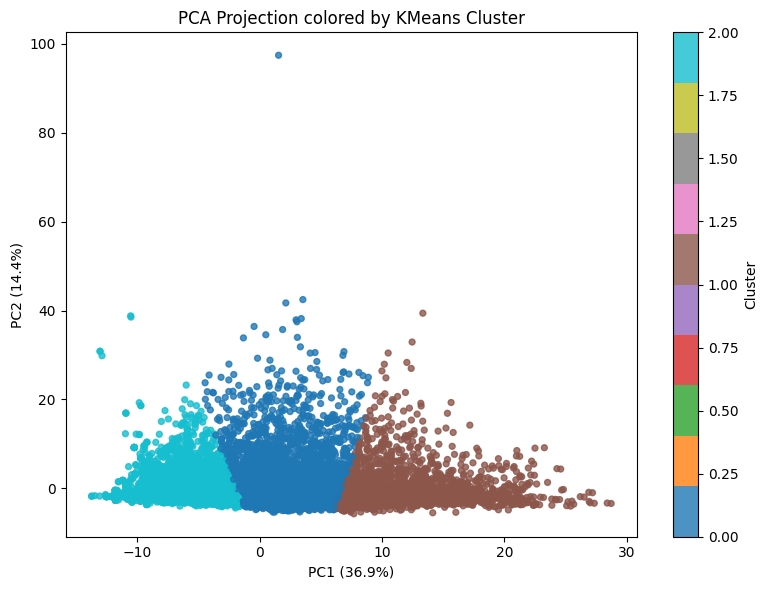

In [7]:
labels = kmeans.fit_predict(X_pca)

# 5. 可视化1：PCA + 聚类标签染色
plt.figure(figsize=(8, 6))
sc1 = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', s=18, alpha=0.8)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Projection colored by KMeans Cluster')
plt.colorbar(sc1, label='Cluster')
plt.tight_layout()
plt.show()

In [8]:
import numpy as np
print(np.__version__)

2.1.0


D:\pycharm\py_project\CGCNN2_data_science_project\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
D:\pycharm\py_project\CGCNN2_data_science_project\.venv\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


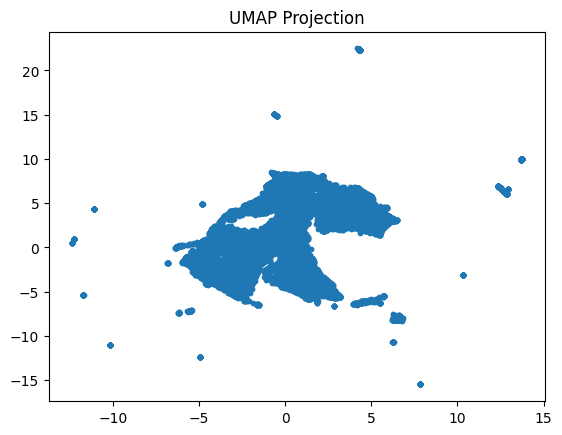

In [9]:
import umap.umap_ as umap
reducer = umap.UMAP(n_components=2, n_neighbors=40, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_scaled)
plt.scatter(X_umap[:,0], X_umap[:,1], s=10)
plt.title("UMAP Projection")
plt.show()

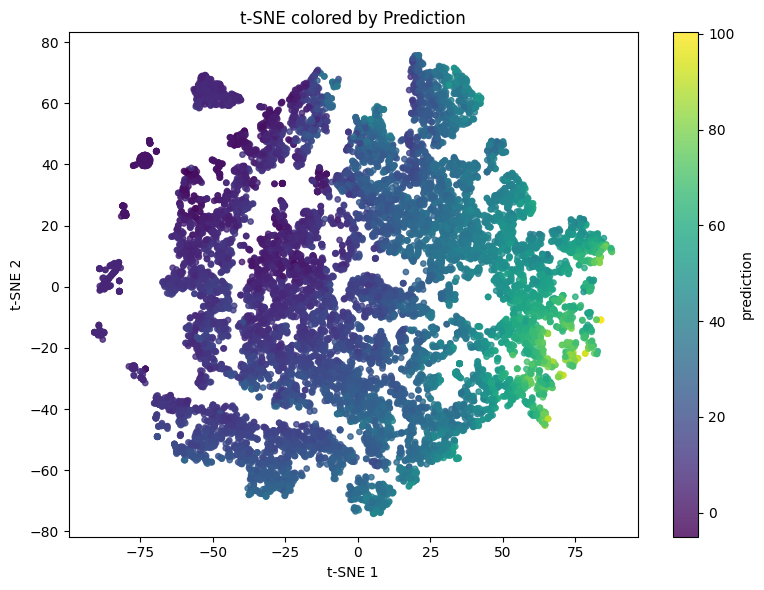

In [10]:
# 8. 可视化3：t-SNE + 性能（性能用颜色）
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=performance, cmap='viridis', s=15, alpha=0.8)
plt.title('t-SNE colored by Prediction')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(sc, label=performance_col)
plt.tight_layout()
plt.show()

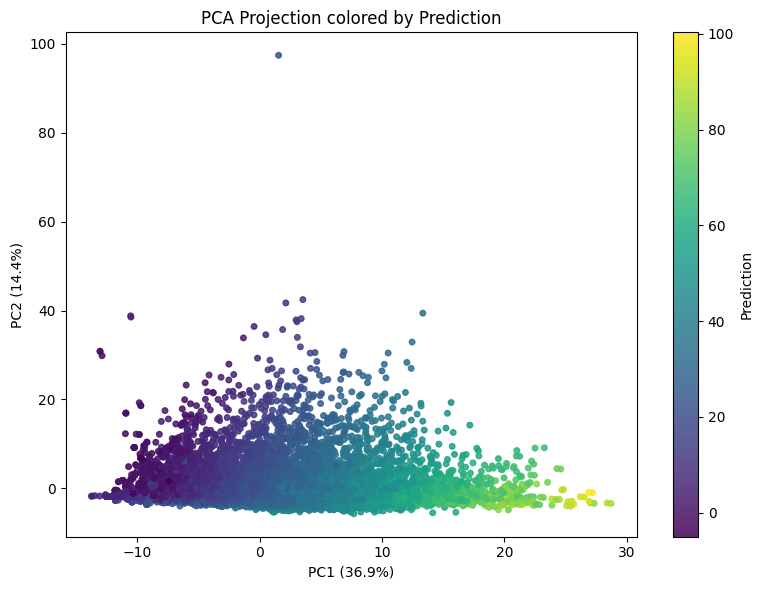

In [11]:
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=16, alpha=0.85)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Projection colored by Prediction')
plt.colorbar(sc, label='Prediction')
plt.tight_layout()
plt.show()

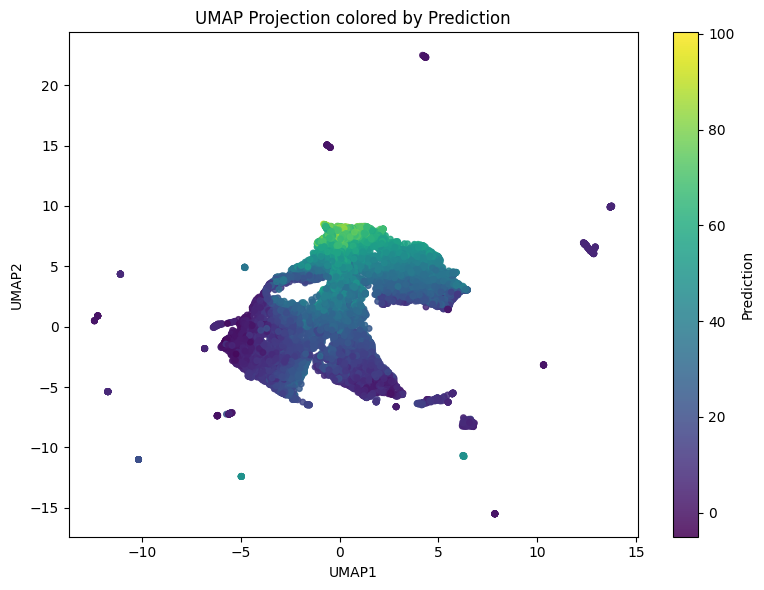

In [12]:
plt.figure(figsize=(8, 6))
sc2 = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=16, alpha=0.85)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP Projection colored by Prediction')
plt.colorbar(sc2, label='Prediction')
plt.tight_layout()
plt.show()

In [13]:
# # 可选：聚类标签加回原数据保存
# df['kmeans_cluster'] = clusters_kmeans
# df['dbscan_cluster'] = clusters_dbscan
# df['tsne1'] = X_tsne[:, 0]
# df['tsne2'] = X_tsne[:, 1]
# df.to_csv('features_with_clusters_tsne.csv', index=False)

In [14]:
# from sklearn.ensemble import RandomForestClassifier
# 
# rf = RandomForestClassifier(n_estimators=100, random_state=42)
# rf.fit(df.values, labels)
# importances = rf.feature_importances_
# 
# # 排名前10的重要特征
# top_idx = np.argsort(importances)[::-1][:10]
# print("Top 10 important features (by RandomForest):")
# for i in top_idx:
#     print(f"feat_{i}: importance={importances[i]:.4f}")

In [15]:
import pandas as pd

# 1. 读取氢储存性能数据，并设置列名
id_prop = pd.read_csv('full_data_cif_part1/id_prop_noext.csv', header=None, names=['material_id', 'actual'])

# 2. 读取特征数据
features = pd.read_csv('features_with_ids.csv')

# 3. 合并，将actual作为新的一列
features_with_actual = pd.merge(features, id_prop, on='material_id', how='left')

# 4. 保存到原文件或新文件
features_with_actual.to_csv('features_with_ids_new.csv', index=False)

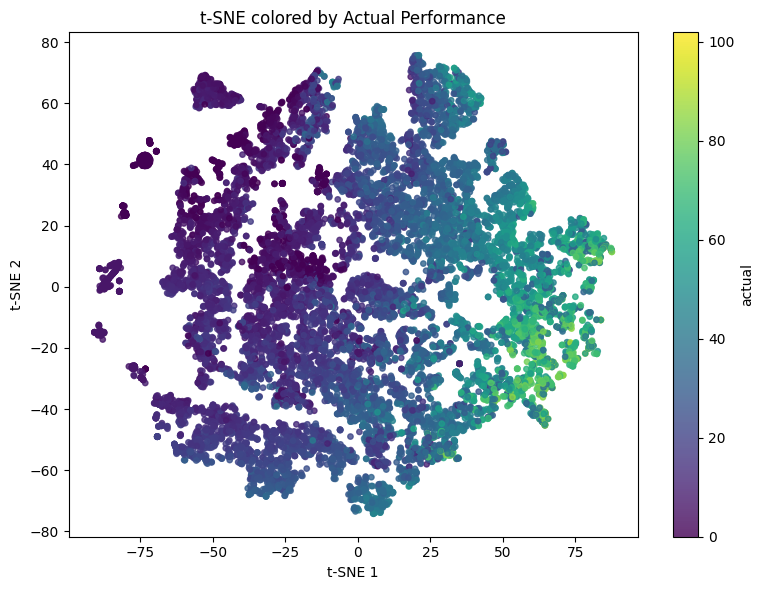

In [16]:
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=actual_value, cmap='viridis', s=15, alpha=0.8)
plt.title('t-SNE colored by Actual Performance')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar(sc, label=actual_performance)
plt.tight_layout()
plt.show()

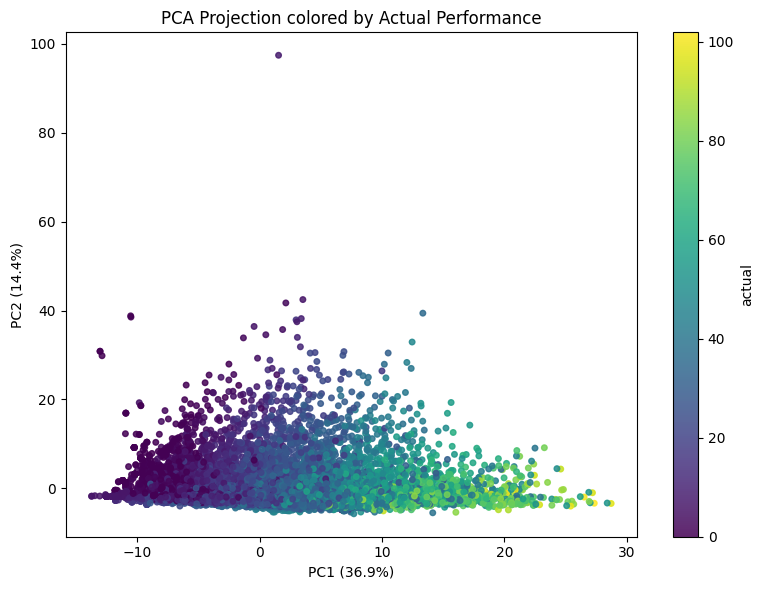

In [17]:
plt.figure(figsize=(8, 6))
sc = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_actuall, cmap='viridis', s=16, alpha=0.85)
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.title('PCA Projection colored by Actual Performance')
plt.colorbar(sc, label=actual_performance)
plt.tight_layout()
plt.show()

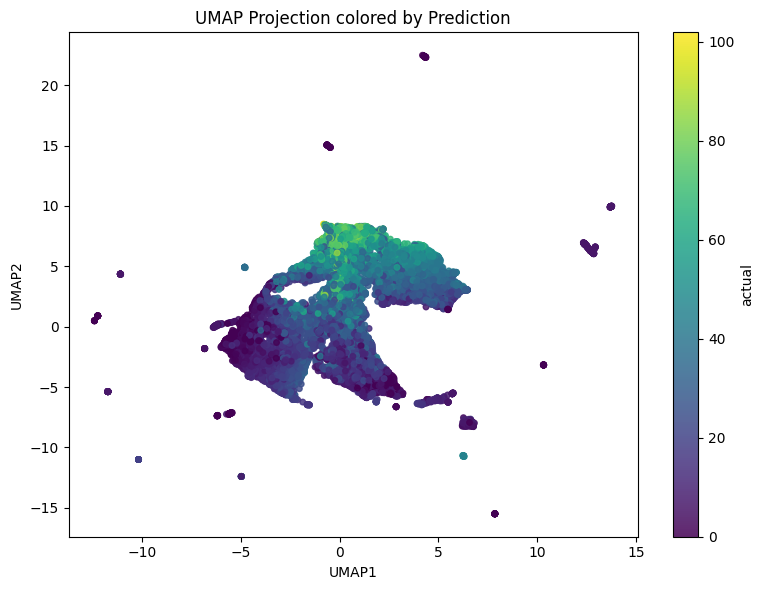

In [18]:
plt.figure(figsize=(8, 6))
sc2 = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_actuall, cmap='viridis', s=16, alpha=0.85)
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')
plt.title('UMAP Projection colored by Prediction')
plt.colorbar(sc2, label=actual_performance)
plt.tight_layout()
plt.show()

In [90]:
import os
import json
import re

json_dir = 'part_1'  # 你的json文件夹
s_list = [2, 3, 4]
all_records = []

In [93]:
def zeta_sum(seq, s):
    seq = np.abs(seq) + 1e-6
    return np.sum(1.0 / (seq ** s))

# --------- 批量提取原始特征（与你原逻辑一致） ---------
for file in os.listdir(json_dir):
    if not file.lower().endswith('.json'):
        continue
    json_path = os.path.join(json_dir, file)
    try:
        with open(json_path, 'r', encoding='utf-8') as f:
            data = json.load(f)
    except Exception as e:
        print(f"Skip {file}: {e}")
        continue

    material_id = os.path.splitext(file)[0]

    cif_txt = data.get("cif", "")
    try:
        a = float(re.search(r"_cell_length_a\s+([\d\.Ee\+\-]+)", cif_txt).group(1))
        b = float(re.search(r"_cell_length_b\s+([\d\.Ee\+\-]+)", cif_txt).group(1))
        c = float(re.search(r"_cell_length_c\s+([\d\.Ee\+\-]+)", cif_txt).group(1))
    except Exception:
        a = b = c = np.nan

    void_fraction = data.get("void_fraction", np.nan)
    surface_area = data.get("surface_area_m2cm3", np.nan)
    lcd = data.get("lcd", np.nan)
    pld = data.get("pld", np.nan)
    ASA = data.get('surface_area_m2g', np.nan)

    struct_feats = [v for v in [a, b, c, void_fraction, surface_area, lcd, pld]
                    if v is not None and not np.isnan(v)]

    record = {
        'material_id': material_id, 'a': a, 'b': b, 'c': c,
        'void_fraction': void_fraction, 'surface_area': surface_area,
        'lcd': lcd, 'pld': pld, 'ASA': ASA
    }

    for s in s_list:
        record[f'zeta_struct_s{s}'] = zeta_sum(struct_feats, s) if struct_feats else np.nan

    # # 目标变量（保留/按需删除）
    # label = np.nan
    # min_T_diff = 1e9
    # target_T = 77
    # target_P = 100
    # if "isotherms" in data:
    #     for iso in data["isotherms"]:
    #         T = iso.get("temperature")
    #         if T is None:
    #             continue
    #         T_diff = abs(T - target_T)
    #         if T_diff < min_T_diff:
    #             min_T_diff = T_diff
    #             isodata = iso.get("isotherm_data", [])
    #             min_P_diff = 1e9
    #             for point in isodata:
    #                 P = point.get("pressure")
    #                 if P is not None and abs(P - target_P) < min_P_diff:
    #                     min_P_diff = abs(P - target_P)
    #                     label = point.get("total_adsorption", np.nan)
    # record['label_77K_100bar'] = label
    all_records.append(record)

# --------- 构建DF并计算“稳定版”ζ ---------
out_df = pd.DataFrame(all_records)

cols = ['a', 'b', 'c', 'void_fraction', 'surface_area', 'lcd', 'pld', 'ASA']
missing = [c for c in cols if c not in out_df.columns]
if missing:
    raise ValueError(f"缺少必要列: {missing}")

def robust_normalize(s: pd.Series) -> pd.Series:
    s = pd.to_numeric(s, errors="coerce")
    med = np.nanmedian(s.values)
    q75 = np.nanpercentile(s.values, 75)
    q25 = np.nanpercentile(s.values, 25)
    iqr = q75 - q25
    scale = iqr if iqr > 0 else (np.nanstd(s.values) or 1.0)
    return (s - med) / scale

# 列级稳健归一化
norm = pd.DataFrame(index=out_df.index)
for c in cols:
    norm[c] = robust_normalize(out_df[c])

# 稳定 ζ：默认 floor/offset 可调整
FLOOR = 1e-2
OFFSET = 0.1

def zeta_sum_stable(seq, s, floor=FLOOR, offset=OFFSET):
    arr = np.asarray(seq, dtype=float)
    arr = arr[np.isfinite(arr)]
    if arr.size == 0:
        return np.nan
    v = np.abs(arr) + offset
    v = np.maximum(v, floor)
    return float(np.sum(1.0 / (v ** s)))

for s in s_list:
    out_df[f'zeta_stable_s{s}'] = norm[cols].apply(
        lambda r: zeta_sum_stable(r.values, s), axis=1
    )

# 导出（按需保留/删除标签列）
# out_df = out_df.drop(columns=['label_77K_100bar'])  # 如不需要标签，可取消注释
out_df.to_csv('features_zeta_77K_100bar.csv', index=False)
print("saved to features_zeta_77K_100bar.csv")

saved to features_zeta_77K_100bar.csv


In [94]:

# def zeta_sum(seq, s):
#     seq = np.abs(seq) + 1e-6  # 避免0和负数
#     return np.sum(1.0 / (seq ** s))
# 
# for file in os.listdir(json_dir):
#     if not file.lower().endswith('.json'):
#         continue
#     json_path = os.path.join(json_dir, file)
#     try:
#         with open(json_path, 'r', encoding='utf-8') as f:
#             data = json.load(f)
#     except Exception as e:
#         print(f"Skip {file}: {e}")
#         continue
# 
#     # mat_id = str(data.get("id", os.path.splitext(file)[0]))
#     material_id = os.path.splitext(file)[0]
#     
#     # 结构特征
#     cif_txt = data.get("cif", "")
#     try:
#         a = float(re.search(r"_cell_length_a\s+([\d\.Ee\+\-]+)", cif_txt).group(1))
#         b = float(re.search(r"_cell_length_b\s+([\d\.Ee\+\-]+)", cif_txt).group(1))
#         c = float(re.search(r"_cell_length_c\s+([\d\.Ee\+\-]+)", cif_txt).group(1))
#     except Exception:
#         a = b = c = np.nan
#     void_fraction = data.get("void_fraction", np.nan)
#     surface_area = data.get("surface_area_m2g", np.nan)
#     lcd = data.get("lcd", np.nan)
#     pld = data.get("pld", np.nan)
# 
#     # zeta特征：a, b, c, void_fraction, surface_area, lcd, pld
#     struct_feats = [v for v in [a, b, c, void_fraction, surface_area, lcd, pld] if v is not None and not np.isnan(v)]
#     record = {'material_id': material_id, 'a': a, 'b': b, 'c': c, 'void_fraction': void_fraction,
#               'surface_area': surface_area, 'lcd': lcd, 'pld': pld}
# 
#     for s in s_list:
#         record[f'zeta_struct_s{s}'] = zeta_sum(struct_feats, s) if struct_feats else np.nan
# 
#     # 目标变量：77K, 100bar
#     label = np.nan
#     min_T_diff = 1e9
#     target_T = 77
#     target_P = 100
#     if "isotherms" in data:
#         for iso in data["isotherms"]:
#             T = iso.get("temperature")
#             if T is None:
#                 continue
#             T_diff = abs(T - target_T)
#             if T_diff < min_T_diff:
#                 min_T_diff = T_diff
#                 # 查找最接近100bar的adsorption
#                 isodata = iso.get("isotherm_data", [])
#                 min_P_diff = 1e9
#                 for point in isodata:
#                     P = point.get("pressure")
#                     if P is not None and abs(P - target_P) < min_P_diff:
#                         min_P_diff = abs(P - target_P)
#                         label = point.get("total_adsorption", np.nan)
#     record['label_77K_100bar'] = label
#     all_records.append(record)

In [95]:

# out_df = pd.DataFrame(all_records)
# out_df = out_df.drop(columns=['label_77K_100bar'])
# out_df.to_csv('features_zeta_77K_100bar.csv', index=False)
# print("已导出到 features_zeta_77K_100bar.csv")

In [96]:
print(len(out_df))

15175


In [97]:
df_features = pd.read_csv('part_1-cif_cgcnn2_features_with_id/features_with_ids_new.csv')
df_zeta = pd.read_csv('features_zeta_77K_100bar.csv')  # 你的新csv名

id_col = 'material_id' if 'material_id' in df_zeta.columns else 'id'
# 3. 求差集（只在zeta里有，不在features里）
extra_ids = set(df_zeta[id_col]) - set(df_features[id_col])

# 4. 输出详情
extra_rows = df_zeta[df_zeta[id_col].isin(extra_ids)]

extra_rows.to_csv('extra_materials.csv', index=False)


In [98]:
import pandas as pd

# 1. 读取数据
df_main = pd.read_csv('part_1-cif_cgcnn2_features_with_id/features_with_ids_new.csv')
df_zeta = pd.read_csv('features_zeta_77K_100bar.csv')

# 2. 按material_id左连接
result = pd.merge(df_main, df_zeta, on='material_id', how='left')

# 3. 保存合并结果
result.to_csv('features_with_ids_new_with_zeta.csv', index=False)
print('已合并并保存到 features_with_ids_new_with_zeta.csv')

已合并并保存到 features_with_ids_new_with_zeta.csv


In [133]:
df = pd.read_csv('features_with_ids_new_with_zeta.csv')
df = df.drop(columns=['prediction','zeta_struct_s2', 'zeta_struct_s3', 'zeta_struct_s4'])
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. 特征和标签
X = df.drop(columns=['material_id', 'actual'])  # 去掉id和标签
print(X.head(5))
# feature_cols = ['void_fraction', 'surface_area', 'lcd', 'pld', 'a', 'b', 'c']
# X = df[feature_cols]
# feature_cols = ['zeta_struct_s2', 'zeta_struct_s3', 'zeta_struct_s4']
# X = df[feature_cols]
y = df['actual']

# 3. 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)



from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0   0.000713   0.051164   2.092555   0.006614   0.000006   0.000010   
1   0.000151   0.036843   1.142691   0.005308   0.000003   0.000002   
2   0.000294   0.023424   0.448986   0.001008   0.000011   0.000002   
3   0.000393   0.060444   0.955970   0.003297   0.000008   0.000003   
4   0.000282   0.047227   0.931436   0.004798   0.000005   0.000002   

   feature_6  feature_7  feature_8  feature_9  ...          b          c  \
0   0.970378   0.000506   0.003249   0.002053  ...  11.127213  16.853935   
1   0.696522   0.000089   0.001808   0.000081  ...  13.018475  28.217404   
2   0.468109   0.000030   0.000413   0.000080  ...  16.334629  13.287793   
3   0.701654   0.000051   0.000830   0.000174  ...  17.959871  12.235711   
4   0.712458   0.000089   0.001496   0.000142  ...  13.398331  15.033150   

   void_fraction  surface_area      lcd      pld       ASA  zeta_stable_s2  \
0       0.574688      1446.370  9.4250

In [134]:

# 4. LightGBM回归
model = LGBMRegressor(
    n_estimators=600,
    learning_rate=0.02,
    max_depth=10,
    num_leaves=60,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# 5. 预测与评估
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 35255
[LightGBM] [Info] Number of data points in the train set: 12898, number of used features: 139
[LightGBM] [Info] Start training from score 26.356101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [135]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 1.29821520949424
R2: 0.9960795087973308


In [136]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, random_state=42, tree_method='hist')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 1.3264594064059347
R2: 0.9959942139057681


In [137]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 2.3683487337247233
R2: 0.9928478034246433


In [138]:
from sklearn.svm import SVR
# 适合已有特征，不适合新特征
model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 15.128043152753076
R2: 0.9543146932340476


In [139]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 70), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 5.130650917122613
R2: 0.9845059034608118


In [140]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(
    n_estimators=2500, 
    random_state=42, 
    n_jobs=-1,     
    bootstrap=False,         # ERT通常不用自助采样      
)
model.fit(X_train_scaled, y_train)

# 5. 预测与评估
y_pred = model.predict(X_test_scaled)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 1.296352556475763
R2: 0.9960851338390951


In [141]:
from catboost import CatBoostRegressor
model = CatBoostRegressor(
    iterations=3000,
    learning_rate=0.06,
    depth=8,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=30)

y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print(len(X_train))
print(len(X_test))

0:	learn: 17.5123959	test: 17.2247307	best: 17.2247307 (0)	total: 51.4ms	remaining: 2m 34s
100:	learn: 1.4880412	test: 1.5761742	best: 1.5761742 (100)	total: 2.23s	remaining: 1m 4s
200:	learn: 1.1542534	test: 1.3003764	best: 1.3003764 (200)	total: 4.43s	remaining: 1m 1s
300:	learn: 0.9685224	test: 1.1757822	best: 1.1757822 (300)	total: 6.69s	remaining: 60s
400:	learn: 0.8539944	test: 1.1120030	best: 1.1120030 (400)	total: 9.04s	remaining: 58.6s
500:	learn: 0.7731767	test: 1.0736788	best: 1.0736788 (500)	total: 11.4s	remaining: 56.7s
600:	learn: 0.7051917	test: 1.0451932	best: 1.0451932 (600)	total: 13.8s	remaining: 55s
700:	learn: 0.6495460	test: 1.0256607	best: 1.0256607 (700)	total: 16.2s	remaining: 53s
800:	learn: 0.6012286	test: 1.0121678	best: 1.0121678 (800)	total: 18.5s	remaining: 50.8s
900:	learn: 0.5600520	test: 1.0010692	best: 1.0010638 (899)	total: 20.8s	remaining: 48.5s
1000:	learn: 0.5226691	test: 0.9920278	best: 0.9920278 (1000)	total: 23.1s	remaining: 46.1s
1100:	learn: 

In [142]:
model.save_model(
    "catboost_model.cbm",
    # format="cbm"  # 可选: 'cbm'|'json'|'onnx'|'coreml'
)

# ===== 3) 重新加载并验证 =====
reloaded = CatBoostRegressor()
reloaded.load_model("catboost_model.cbm")

y_pred_reload = reloaded.predict(X_test)
print("Reload MSE:", mean_squared_error(y_test, y_pred_reload))
print("Reload R2:", r2_score(y_test, y_pred_reload))

# ===== 4) 可选：保存为 JSON（可读/跨语言，但体积更大） =====
# 注意：JSON 适合检查/迁移；部署时 .cbm 更常用
model.save_model("catboost_model.json", format="json")


Reload MSE: 0.8969352667048397
Reload R2: 0.9972913375249624


In [143]:
from pytorch_tabnet.tab_model import TabNetRegressor
import warnings

# Only suppress this specific warning from pytorch_tabnet.abstract_model
# Why: Avoid hiding other useful warnings.
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    module=r"pytorch_tabnet\.abstract_model",
    message=r"Device used : .*"
)

y = df['actual']

# TabNet model
model = TabNetRegressor(verbose=1, seed=42, device_name="cpu")
model.fit(
    X_train.values, y_train.values.reshape(-1,1),
    eval_set=[(X_test.values, y_test.values.reshape(-1,1))],
    # eval_metric=['rmse'],
    max_epochs=200,
    patience=30,
    batch_size=128,
    virtual_batch_size=128
)

# 预测与评估
y_pred = model.predict(X_test.values).flatten()
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

epoch 0  | loss: 272.30401| val_0_mse: 324.51943|  0:00:07s
epoch 1  | loss: 24.81454| val_0_mse: 60.50221|  0:00:13s
epoch 2  | loss: 13.66766| val_0_mse: 11.19691|  0:00:20s
epoch 3  | loss: 11.66497| val_0_mse: 9.50523 |  0:00:26s
epoch 4  | loss: 9.7206  | val_0_mse: 5.4405  |  0:00:33s
epoch 5  | loss: 9.8677  | val_0_mse: 4.78802 |  0:00:39s
epoch 6  | loss: 10.53387| val_0_mse: 5.56881 |  0:00:46s
epoch 7  | loss: 8.88218 | val_0_mse: 9.07119 |  0:00:52s
epoch 8  | loss: 8.23061 | val_0_mse: 4.43095 |  0:00:59s
epoch 9  | loss: 7.26918 | val_0_mse: 6.6953  |  0:01:05s
epoch 10 | loss: 9.15937 | val_0_mse: 3.39952 |  0:01:12s
epoch 11 | loss: 6.51057 | val_0_mse: 1.85676 |  0:01:18s
epoch 12 | loss: 7.18476 | val_0_mse: 3.17663 |  0:01:23s
epoch 13 | loss: 5.90864 | val_0_mse: 5.66753 |  0:01:29s
epoch 14 | loss: 8.03358 | val_0_mse: 2.2945  |  0:01:35s
epoch 15 | loss: 6.35452 | val_0_mse: 1.69554 |  0:01:42s
epoch 16 | loss: 6.09512 | val_0_mse: 4.97229 |  0:01:47s
epoch 17 | l

D:\pycharm\py_project\CGCNN2_data_science_project\.venv\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


MSE: 1.035209100709961
R2: 0.9968737631922848


## Traditional column prediction

In [ ]:
df = pd.read_csv('features_with_ids_new_with_zeta.csv')
df = df.drop(columns=['prediction', 'zeta_struct_s2', 'zeta_struct_s3', 'zeta_struct_s4'])
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 2. 特征和标签
X = df.drop(columns=['material_id', 'actual'])  # 去掉id和标签
need = ["a", "b", "c", "void_fraction", "surface_area", "lcd", "pld"]
X = df[need].apply(pd.to_numeric, errors="coerce")
# feature_cols = ['void_fraction', 'surface_area', 'lcd', 'pld', 'a', 'b', 'c']
# X = df[feature_cols]
# feature_cols = ['zeta_struct_s2', 'zeta_struct_s3', 'zeta_struct_s4']
# X = df[feature_cols]
y = df['actual']

# 3. 划分训练/测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [157]:
# 4. LightGBM回归
model = LGBMRegressor(
    n_estimators=600,
    learning_rate=0.02,
    max_depth=10,
    num_leaves=60,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=1.0,
    reg_lambda=1.0,
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# 5. 预测与评估
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1595
[LightGBM] [Info] Number of data points in the train set: 12898, number of used features: 7
[LightGBM] [Info] Start training from score 26.356101
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

In [147]:

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 17.69934980364335
R2: 0.9465495823106379


In [148]:

from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, random_state=42, tree_method='hist')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 18.213220423794404
R2: 0.9449977400345047


In [149]:

from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 57.253035561242335
R2: 0.8271010687577702


In [150]:

from sklearn.svm import SVR

# 适合已有特征，不适合新特征
model = SVR(kernel='rbf', C=1.0, epsilon=0.2)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 22.08836823900723
R2: 0.9332951480393734


In [151]:

from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, 70), max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 19.471442101345563
R2: 0.9411980256406417


In [152]:

from sklearn.ensemble import ExtraTreesRegressor

model = ExtraTreesRegressor(
    n_estimators=2500,
    random_state=42,
    n_jobs=-1,
    bootstrap=False,  # ERT通常不用自助采样      
)
model.fit(X_train_scaled, y_train)

# 5. 预测与评估
y_pred = model.predict(X_test_scaled)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 18.031218144987353
R2: 0.9455473702712408


In [153]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(
    iterations=3000,
    learning_rate=0.06,
    depth=8,
    loss_function='RMSE',
    random_seed=42,
    verbose=100
)
model.fit(X_train, y_train, eval_set=(X_test, y_test), early_stopping_rounds=30)

y_pred = model.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))
print(len(X_train))
print(len(X_test))
model.save_model(
    "catboost_model_2.cbm",
    # format="cbm"  # 可选: 'cbm'|'json'|'onnx'|'coreml'
)

0:	learn: 17.5177120	test: 17.2370761	best: 17.2370761 (0)	total: 27.4ms	remaining: 1m 22s
100:	learn: 4.3503857	test: 4.2220589	best: 4.2220589 (100)	total: 1.3s	remaining: 37.4s
200:	learn: 4.0467545	test: 4.1285934	best: 4.1285934 (200)	total: 2.57s	remaining: 35.7s
300:	learn: 3.8210004	test: 4.1020355	best: 4.1001344 (293)	total: 3.83s	remaining: 34.3s
Stopped by overfitting detector  (30 iterations wait)

bestTest = 4.100134359
bestIteration = 293

Shrink model to first 294 iterations.
MSE: 16.811101732157613
R2: 0.9492320102506129
12898
2277


In [154]:

# ===== 3) 重新加载并验证 =====
reloaded = CatBoostRegressor()
reloaded.load_model("catboost_model_2.cbm")

y_pred_reload = reloaded.predict(X_test)
print("Reload MSE:", mean_squared_error(y_test, y_pred_reload))
print("Reload R2:", r2_score(y_test, y_pred_reload))

# ===== 4) 可选：保存为 JSON（可读/跨语言，但体积更大） =====
# 注意：JSON 适合检查/迁移；部署时 .cbm 更常用
model.save_model("catboost_model_2.json", format="json")

Reload MSE: 16.811101732157613
Reload R2: 0.9492320102506129


In [155]:

from pytorch_tabnet.tab_model import TabNetRegressor
import warnings

# Only suppress this specific warning from pytorch_tabnet.abstract_model
# Why: Avoid hiding other useful warnings.
warnings.filterwarnings(
    "ignore",
    category=UserWarning,
    module=r"pytorch_tabnet\.abstract_model",
    message=r"Device used : .*"
)

y = df['actual']

# TabNet model
model = TabNetRegressor(verbose=1, seed=42, device_name="cpu")
model.fit(
    X_train.values, y_train.values.reshape(-1, 1),
    eval_set=[(X_test.values, y_test.values.reshape(-1, 1))],
    # eval_metric=['rmse'],
    max_epochs=200,
    patience=30,
    batch_size=128,
    virtual_batch_size=128
)

# 预测与评估
y_pred = model.predict(X_test.values).flatten()
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

epoch 0  | loss: 244.02902| val_0_mse: 182.05543|  0:00:04s
epoch 1  | loss: 32.31317| val_0_mse: 89.22106|  0:00:09s
epoch 2  | loss: 30.17657| val_0_mse: 57.58821|  0:00:14s
epoch 3  | loss: 28.90165| val_0_mse: 30.51118|  0:00:19s
epoch 4  | loss: 30.60685| val_0_mse: 20.81048|  0:00:23s
epoch 5  | loss: 29.76928| val_0_mse: 24.54807|  0:00:28s
epoch 6  | loss: 31.38336| val_0_mse: 21.01587|  0:00:33s
epoch 7  | loss: 29.83542| val_0_mse: 24.81258|  0:00:38s
epoch 8  | loss: 29.16941| val_0_mse: 22.73458|  0:00:42s
epoch 9  | loss: 29.14295| val_0_mse: 21.72959|  0:00:47s
epoch 10 | loss: 28.29066| val_0_mse: 23.41678|  0:00:52s
epoch 11 | loss: 27.74515| val_0_mse: 44.69752|  0:00:57s
epoch 12 | loss: 27.34095| val_0_mse: 40.63662|  0:01:01s
epoch 13 | loss: 28.4872 | val_0_mse: 31.58356|  0:01:06s
epoch 14 | loss: 29.12173| val_0_mse: 22.13461|  0:01:11s
epoch 15 | loss: 26.77965| val_0_mse: 45.6681 |  0:01:16s
epoch 16 | loss: 29.54751| val_0_mse: 28.19046|  0:01:21s
epoch 17 | l

D:\pycharm\py_project\CGCNN2_data_science_project\.venv\Lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


MSE: 19.439178256403533
R2: 0.9412954595016336


In [156]:
# path: qml_hydrogen_storage_vqr_fast.py
# coding: utf-8

import os
import sys
import time
import warnings
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge

# Optional: cap BLAS threads to avoid oversubscription (tune 1~4)
os.environ.setdefault("OMP_NUM_THREADS", "4")
os.environ.setdefault("MKL_NUM_THREADS", "4")
os.environ.setdefault("OPENBLAS_NUM_THREADS", "4")
os.environ.setdefault("NUMEXPR_NUM_THREADS", "4")

# tqdm progress bar (graceful fallback)
try:
    from tqdm.auto import tqdm
except Exception:
    def tqdm(iterable=None, total=None, desc=None, unit=None):
        return iterable if iterable is not None else range(total or 0)

# Qiskit ML stack
try:
    try:
        from qiskit.primitives import StatevectorEstimator as EstimatorV2
        HAVE_V2 = True
    except Exception:
        EstimatorV2 = None
        HAVE_V2 = False

    try:
        from qiskit.primitives import Estimator as EstimatorV1
    except Exception:
        EstimatorV1 = None

    from qiskit.circuit.library import ZZFeatureMap, TwoLocal
    from qiskit_algorithms.optimizers import COBYLA
    from qiskit_machine_learning.algorithms import VQR
except Exception:
    print(
        "Missing Qiskit ML. Install:\n"
        "  pip install 'qiskit-machine-learning>=0.6' qiskit qiskit-algorithms\n"
        "and ensure qiskit>=1.2 for StatevectorEstimator."
    )
    raise


def get_estimator():
    """Prefer V2 StatevectorEstimator; fallback to deprecated V1 Estimator."""
    if HAVE_V2 and EstimatorV2 is not None:
        return EstimatorV2()
    if EstimatorV1 is not None:
        warnings.filterwarnings("ignore", category=DeprecationWarning)
        return EstimatorV1()
    raise ImportError("No usable Estimator. Please upgrade qiskit (>=1.2).")


def load_and_prepare(csv_path: str):
    """Load CSV, drop specific columns, keep numeric only, cast to float32."""
    t0 = time.perf_counter()
    df = pd.read_csv(csv_path)
    drop_cols = ['prediction', 'zeta_struct_s2', 'zeta_struct_s3', 'zeta_struct_s4']
    exist = [c for c in drop_cols if c in df.columns]
    if exist:
        df = df.drop(columns=exist)

    drop_for_X = [c for c in ['material_id', 'actual', 'label_77K_100bar'] if c in df.columns]
    X = df.drop(columns=drop_for_X)
    need = ["void_fraction", "surface_area", "lcd", "pld", "ASA"]
    X = df[need].apply(pd.to_numeric, errors="coerce")
    y = df['actual'].astype(np.float32)

    # numeric-only + float32
    X = X.select_dtypes(include=[np.number]).astype(np.float32).copy()
    print(f"[Load] shape={X.shape}, time={time.perf_counter()-t0:.2f}s")
    return X, y


def build_preprocessor(n_qubits: int, use_incremental: bool = False):
    """
    Standardize -> PCA -> MinMax([0, 2π]).
    PCA uses randomized SVD by default for speed; can switch to IncrementalPCA.
    """
    if use_incremental:
        pca = IncrementalPCA(n_components=n_qubits, batch_size=2048)
    else:
        pca = PCA(n_components=n_qubits, random_state=42, svd_solver="randomized", iterated_power=3)

    return [
        ("impute",   SimpleImputer(strategy="median")),  # robust to NaN
        ("standard", StandardScaler(with_mean=True, with_std=True)),
        ("pca",      pca),
        ("minmax",   MinMaxScaler(feature_range=(0.0, 2.0 * np.pi))),
    ]


def apply_preprocessor(steps, X_train, X_test):
    """Fit on train; chain-transform both; print timing per stage."""
    Xt_train, Xt_test = X_train, X_test
    fitted = []
    for name, step in tqdm(steps, desc="Preprocessing", unit="stage"):
        t0 = time.perf_counter()
        step.fit(Xt_train)
        Xt_train = step.transform(Xt_train)
        Xt_test  = step.transform(Xt_test)
        dt = time.perf_counter() - t0
        print(f"  - {name:<9s}: out_shape={Xt_train.shape}, time={dt:.2f}s")
        if Xt_train.shape[1] != Xt_test.shape[1]:
            raise ValueError(f"[{name}] train/test feature mismatch: {Xt_train.shape[1]} vs {Xt_test.shape[1]}")
        fitted.append((name, step))
    return Xt_train, Xt_test, fitted


def build_vqr_model(n_qubits: int, reps: int = 2, maxiter: int = 300, progress=True):
    """VQR with ZZFeatureMap + TwoLocal ansatz; attach optimizer progress bar."""
    feature_map = ZZFeatureMap(feature_dimension=n_qubits, reps=reps)
    ansatz = TwoLocal(num_qubits=n_qubits, rotation_blocks=['ry', 'rz'], entanglement='cz', reps=reps)
    optimizer = COBYLA(maxiter=maxiter)
    estimator = get_estimator()

    vqr_kwargs = dict(feature_map=feature_map, ansatz=ansatz, optimizer=optimizer,
                      estimator=estimator, loss='squared_error')

    pbar = None
    if progress:
        try:
            pbar = tqdm(total=maxiter, desc="VQR optimize", unit="iter")
            def _cb(*args, **kwargs):
                try:
                    pbar.update(1)
                except Exception:
                    pass
            vqr_kwargs["callback"] = _cb
        except TypeError:
            pbar = None

    try:
        vqr = VQR(**vqr_kwargs)
    except TypeError:
        # If V2 estimator incompatible with your qiskit-ml, fallback to V1
        vqr_kwargs["estimator"] = EstimatorV1()
        vqr = VQR(**vqr_kwargs)

    vqr._progress_bar = pbar
    return vqr


def main(csv_path: str = "features_with_ids_new_with_zeta.csv",
         test_size: float = 0.15,
         n_qubits: int = 4,
         reps: int = 2,
         maxiter: int = 300,
         use_incremental_pca: bool = False):
    steps_total = 6
    step_bar = tqdm(total=steps_total, desc="Pipeline", unit="step")

    # 1) Load
    X, y = load_and_prepare(csv_path)
    step_bar.update(1)

    # 2) Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )
    print(f"[Split] train={X_train.shape}, test={X_test.shape}")
    step_bar.update(1)

    # 3) Preprocess
    pre_steps = build_preprocessor(n_qubits=n_qubits, use_incremental=use_incremental_pca)
    X_train_q, X_test_q, fitted_pre = apply_preprocessor(pre_steps, X_train, X_test)
    step_bar.update(1)

    # 4) VQR
    vqr = build_vqr_model(n_qubits=n_qubits, reps=reps, maxiter=maxiter, progress=True)
    step_bar.update(1)

    # 5) Train
    t0 = time.perf_counter()
    vqr.fit(X_train_q.astype(np.float32), y_train.values.astype(np.float32))
    if getattr(vqr, "_progress_bar", None) is not None:
        try:
            vqr._progress_bar.close()
        except Exception:
            pass
    print(f"[Train] time={time.perf_counter()-t0:.2f}s")
    step_bar.update(1)

    # 6) Evaluate
    y_pred = vqr.predict(X_test_q.astype(np.float32)).ravel()
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    print("\n[Quantum VQR Results]")
    print(f"Test MSE: {mse:.6f}")
    print(f"Test R^2: {r2:.6f}")

    # Classical baseline
    ridge = Ridge(alpha=1.0, random_state=42)
    base_scaler = dict(fitted_pre)["standard"]
    base_pca    = dict(fitted_pre)["pca"]
    X_train_base = base_pca.transform(base_scaler.transform(X_train))
    X_test_base  = base_pca.transform(base_scaler.transform(X_test))
    ridge.fit(X_train_base, y_train)
    y_pred_cls = ridge.predict(X_test_base)
    mse_cls = mean_squared_error(y_test, y_pred_cls)
    r2_cls  = r2_score(y_test, y_pred_cls)
    print("\n[Classical Ridge Baseline]")
    print(f"Test MSE: {mse_cls:.6f}")
    print(f"Test R^2: {r2_cls:.6f}")

    # Save artifacts
    out_dir = "./qml_outputs"
    os.makedirs(out_dir, exist_ok=True)
    np.save(os.path.join(out_dir, "y_test.npy"), y_test.values)
    np.save(os.path.join(out_dir, "y_pred_vqr.npy"), y_pred)
    np.save(os.path.join(out_dir, "y_pred_ridge.npy"), y_pred_cls)
    print(f"\nSaved predictions to: {os.path.abspath(out_dir)}")

    step_bar.update(1)
    try:
        step_bar.close()
    except Exception:
        pass


if __name__ == "__main__":
    # If still slow, try: reps=1, n_qubits=3, maxiter=150, use_incremental_pca=True
    main(
        csv_path="features_with_ids_new_with_zeta.csv",
        test_size=0.15,
        n_qubits=4,
        reps=2,
        maxiter=300,
        use_incremental_pca=False,
    )


Pipeline:   0%|          | 0/6 [00:00<?, ?step/s]

[Load] shape=(15175, 5), time=0.80s
[Split] train=(12898, 5), test=(2277, 5)


Preprocessing:   0%|          | 0/4 [00:00<?, ?stage/s]

  - impute   : out_shape=(12898, 5), time=0.07s
  - standard : out_shape=(12898, 5), time=0.01s
  - pca      : out_shape=(12898, 4), time=0.05s
  - minmax   : out_shape=(12898, 4), time=0.01s


VQR optimize:   0%|          | 0/300 [00:00<?, ?iter/s]

No gradient function provided, creating a gradient function. If your Estimator requires transpilation, please provide a pass manager.


KeyboardInterrupt: 